Suppose that consumption growth has lognormal distribution with the possibility of rare disasters:

ln(g) = 0.02 + 0.02ε + ν

Here ε is a standard normal random variable, while ν is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).

Simulate ε with (at least) 10e4 random draws from standard normal distribution, and simulate ν with (at least) 10e4 random draws from standard uniform distribution.

Use the simulated distribution of consumption growth to find the simulated distribution of the pricing kernel for power utility:

M = 0.99g ** -γ

Repeat this process for values of γ in the range from 1 to 4, in increments of 0.1 (or less). (Note that you can reuse the same simulated distribution of consumption growth for all values of γ). 

 - Calculate μM and σM for each value of γ, and plot σM/μM (on the vertical axis) vs γ (on the horizontal axis).

 - Find the smallest value of γ (in your data) for which σM/μM > 0.4. Explain (in words, without using any mathematical  equations or formulas) the economic significance of this result.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

In [2]:
# initialize variables
n_simulations = 100000

In [3]:
random_epsilon = np.random.normal(0, 1)

In [4]:
random_nu = np.random.uniform(0, 1)

In [5]:
def consumption_growth (epsilon, nu):
    growth = np.exp(0.02 + 0.02*epsilon + nu)           # can change consumption growth rate and standard deviation here
    return growth

In [6]:
def pricing_kernel (growth, gamma):
    return 0.99*growth**(-gamma)                        # can change discount factor here

In [7]:
columns = ["epsilon",
           "nu",
           "growth",]

In [8]:
# Create dataframe to store simulation results

Simulation_df = pd.DataFrame(index=range(n_simulations), columns=columns)

Simulation_df["epsilon"] = np.random.normal(0, 1, (n_simulations))

Simulation_df["nu_draw"] = np.random.uniform(0, 1, (n_simulations))

# pi is the proability of rare disasters in a given year
# phi is the fraction of output that remains after disaster
Simulation_df["nu"] = np.where(Simulation_df["nu_draw"] <= 0.017, np.log(0.65), 0)          # can change probability of rare disasters, amount that is left after disaster

Simulation_df["growth"] = consumption_growth (Simulation_df["epsilon"], Simulation_df["nu"])

In [9]:
np.log(0.65)

-0.4307829160924542

In [10]:
Simulation_df

,epsilon,nu,growth,nu_draw
0,0.320958,0.0,1.026771,0.550305
1,-2.534630,0.0,0.969774,0.569041
2,0.613889,0.0,1.032804,0.343344
3,1.029728,0.0,1.041430,0.723091
4,-0.134083,0.0,1.017469,0.304722
...,...,...,...,...
99995,-0.479467,0.0,1.010465,0.073641
99996,0.986195,0.0,1.040523,0.329654
99997,1.611118,0.0,1.053610,0.996129
99998,-0.063651,0.0,1.018903,0.670580


In [11]:
gamma_range = np.arange(1, 4.1, 0.1)

In [12]:
Pricing_Kernel_df = pd.DataFrame(index=range(n_simulations), columns=gamma_range)

for gamma in gamma_range:
    Pricing_Kernel_df.loc[:,gamma] = pricing_kernel (Simulation_df["growth"], gamma)

In [13]:
Pricing_Kernel_transposed_df = Pricing_Kernel_df.T

In [14]:
Pricing_Kernel_transposed_df["mean"]=Pricing_Kernel_transposed_df.mean(axis=1)
Pricing_Kernel_transposed_df["std"]=Pricing_Kernel_transposed_df.std(axis=1)
Pricing_Kernel_transposed_df["volatility_ratio"]=Pricing_Kernel_transposed_df["std"]/Pricing_Kernel_transposed_df["mean"]

In [15]:
Pricing_Kernel_transposed_df

,0,1,2,3,4,5,6,7,8,9,...,99993,99994,99995,99996,99997,99998,99999,mean,std,volatility_ratio
1.0,0.964188,1.020857,0.958555,0.950616,0.973002,0.970092,0.96739,0.995404,0.983122,0.965155,...,0.981043,0.996578,0.979747,0.951444,0.939627,0.971633,0.971573,0.98003,0.072236,0.073708
1.1,0.961644,1.023995,0.955466,0.946765,0.971319,0.968123,0.965157,0.995946,0.982437,0.962705,...,0.980152,0.997238,0.978727,0.947672,0.934732,0.969815,0.96975,0.979298,0.081038,0.082751
1.2,0.959106,1.027143,0.952387,0.942929,0.969638,0.966159,0.96293,0.996488,0.981752,0.960261,...,0.979261,0.997899,0.977709,0.943915,0.929864,0.968,0.967929,0.97862,0.09018,0.09215
1.3,0.956576,1.0303,0.949318,0.939109,0.96796,0.964198,0.960708,0.997031,0.981068,0.957823,...,0.978371,0.99856,0.976692,0.940173,0.92502,0.966189,0.966112,0.977999,0.099678,0.101921
1.4,0.954052,1.033467,0.946259,0.935305,0.966285,0.962241,0.958491,0.997574,0.980384,0.955392,...,0.977483,0.999221,0.975675,0.936446,0.920202,0.964382,0.964299,0.977437,0.109548,0.112077
1.5,0.951535,1.036644,0.943209,0.931516,0.964613,0.960288,0.956279,0.998117,0.979701,0.952967,...,0.976595,0.999883,0.97466,0.932733,0.915409,0.962577,0.962489,0.976936,0.119807,0.122636
1.6,0.949024,1.039831,0.94017,0.927742,0.962944,0.95834,0.954072,0.998661,0.979018,0.950548,...,0.975707,1.000546,0.973646,0.929035,0.910641,0.960776,0.960682,0.976499,0.130472,0.133612
1.7,0.94652,1.043027,0.93714,0.923983,0.961278,0.956395,0.951871,0.999205,0.978336,0.948135,...,0.974821,1.001209,0.972633,0.925352,0.905898,0.958979,0.958879,0.976127,0.14156,0.145022
1.8,0.944023,1.046233,0.93412,0.92024,0.959615,0.954454,0.949674,0.999749,0.977654,0.945728,...,0.973935,1.001872,0.971621,0.921684,0.90118,0.957185,0.957079,0.975824,0.153091,0.156884
1.9,0.941532,1.049449,0.93111,0.916512,0.957954,0.952517,0.947483,1.000293,0.976973,0.943327,...,0.973051,1.002536,0.97061,0.918029,0.896486,0.955394,0.955283,0.975591,0.165084,0.169214


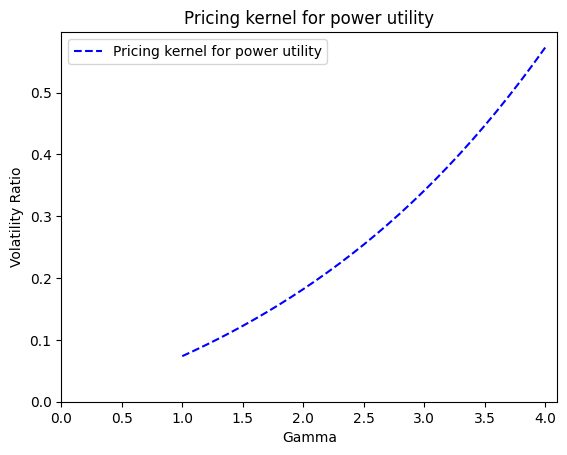

In [16]:
plt.plot( Pricing_Kernel_transposed_df.index, 
         Pricing_Kernel_transposed_df["volatility_ratio"],
         color='blue', 
         linestyle='--', 
         label = "Pricing kernel for power utility")


plt.yticks(np.arange(0, 0.6, 0.1))
plt.xlim(0,4.1)
plt.xlabel('Gamma')
plt.ylabel('Volatility Ratio')
plt.title('Pricing kernel for power utility')
plt.legend()
plt.show()

### Smallest value of γ for which σM/μM > 0.4

In [17]:
# Filter the DataFrame where 'volatility_ratio' > 0.4
filtered_df = Pricing_Kernel_transposed_df[Pricing_Kernel_transposed_df["volatility_ratio"] > 0.4]  # can change minimum value of volatility ratio to look for here

# Get the index of the minimum value from the filtered DataFrame
min_index = filtered_df["volatility_ratio"].idxmin()

# Print the formatted index
print(f"Smallest value of  γ for which σM/μM > 0.4: {min_index:.1f}")

Smallest value of  γ for which σM/μM > 0.4: 3.3


### Explain (in words, without using mathematical equations or formulas) the economic significance of this result.

According to the Hansen–Jagannathan (H–J) bound, the volatility ratio of the pricing kernel cannot be less than the highest Sharpe ratio of all possible portfolios. Do note that it is not necessary that the market portfolio has the highest Sharpe ratio. Considering that the US stock market historically has a Sharpe ratio of around 0.4, from the Hansen-Jagannthan bound, the volatility ratio (σM/μM) has to be equal to or higher than 0.4 as well, which leads to a minimum gamma value of 3.4. A gamma of 3.4 signifies a moderate degree of risk aversion and is consistent with real-world observations. 

 In other words, as gamma is the constant coefficient of investor's risk aversion for an investor with power utility of consumption, the economic significance of a gamma value of 3.4 is that assuming that consumption growth grows at 2% a year, the standard deviation of consumption growth is also 2%, disasters happen with a probability of 1.7% and when disasters occur, 35% of optimal consumption is lost, an investor with power utility of consumption should have a risk aversion of 3.4. Accordingly, there is no equity premium puzzle as 3.4 is a reasonable degree of risk aversion.

The possiblity of rare disasters (1.7% chance of happening in any given year), greatly increases volatility and negative (left) skewness of consumption growth and so gamma is much smaller compared with a model that does not take into account the possibility of rare disasters, helping resolve the equity premium puzzle.

 The equity premium puzzle occurs when (without considering the possibility of rare disasters), using a Sharpe ratio of 0.4 and a standard deviation of consumption growth of 2%, an investor with time separable power utility of consumption and lognormal consumption growth, must have a constant relative risk aversion of > 20 to explain the equity premium observed in reality, which is an unreasonably high. This occurs as consumption growth (without rare disasters) appears to be very stable but pricing kernel is very volatile, and therefore we would need a high degree of risk aversion that magnifies the volatility of consumption growth.

As the pricing kernel also acts as the intertemporal marginal rate of substitution, it also captures how much an investor values future consumption compared to current consumption, based on uncertainty and risk preferences. As the pricing kernel has a limit of zero but no upper limit, its probability distribution must be heavily skewed to the right side. As investors are risk-averse, they demand higher compensation (a premium) for holding risky assets like stocks, and the volatility of the pricing kernel reflects that compensation.

Therefore, even though a gamma of 3.4 is reasonable, we note that σM/μM > 0.4 would mean that the pricing kernel is rather volatile, as the value of the standard deviation of the pricing kernel is more than 40% that of the mean value of the pricing kernel. A volatile pricing kernel implies that investors' willingness to shift consumption between today and tomorrow changes drastically with new information. This volatility in preferences shows that investors are sensitive to unexpected changes, such as rare disasters.

Since the intertemporal marginal rate of substitution (IMRS) is tied to the pricing kernel, this also means that asset prices will fluctuate significantly in response to new information about consumption growth. In other words, asset prices become more volatile, which is consistent with what we see in the stock market, especially during periods of uncertainty or crisis.